ML Course, Bogotá, Colombia  (&copy; Josh Bloom; June 2019)

In [2]:
%run ../talktools.py

<img src="https://www.evernote.com/l/AUVOiUntlxZHM60VXN8WZWzg83pzEIL-XJwB/image.png" width="50%">

Building Trees Rigorously (Node Splitting Criteria)

<img src="https://www.evernote.com/l/AUVA6K4mqnhOMoNcy93La3lFe5XOAxgaWrUB/image.png">

# Collections of Trees ("Decision Forests", "Random Forests")

<img src="https://contentmamluswest001.blob.core.windows.net/content/14b2744cf8d6418c87ffddc3f3127242/9502630827244d60a1214f250e3bbca7/b729c21014a34955b20fa94dc13390e5/image">

### Classifying NIST Handwritten Digits

We will try to classify handwritten digits (0-9) from their raw pixelated images.

Each image is 8 $\times$ 8 pixels.  We will not do any feature extraction and instead classify based on the intensity values for each pixel.

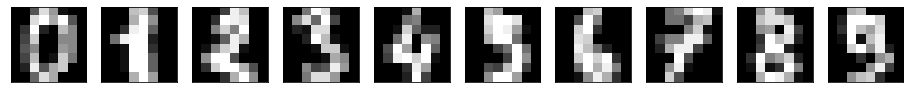

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
# import NIST digits data set (1797 8x8 images)
digits = datasets.load_digits()

f,axs = plt.subplots(1,10,figsize=(16, 6))
objarr = np.empty_like(axs)
for n, ax in enumerate(axs.flat):
    objarr.flat[n] = ax.imshow(digits['images'][n], cmap='gray', interpolation='nearest')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

$\textbf{Now we split the data into a training and testing set.}$

$\textbf{We will only fit the classifier on the training set and use the testing set to evaluate performance.}$

In [4]:
# take the first 500 as training
train = 500
Xtr = digits['data'][:train]
Ytr = digits['target'][:train]
print("training size: " + str(len(Ytr)))

# testing set
Xte = digits['data'][train:]
Yte = digits['target'][train:]
print("testing size: " + str(len(Yte)))

training size: 500
testing size: 1297


### Fit a Random Forest Classifier

In [5]:
# Create a classifier: 
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier object
classifier = RandomForestClassifier(n_estimators=50)

# fit the classification model on training set
classifier.fit(Xtr, Ytr)

# make predictions for testing set
pred_rf = classifier.predict(Xte) 

print("True Class / Predicted class")
print(np.vstack((Yte[0:10],pred_rf[0:10])))

True Class / Predicted class
[[8 2 2 5 7 9 5 4 8 8]
 [6 2 2 5 7 9 5 4 8 8]]


http://cs.stanford.edu/people/karpathy/svmjs/demo/demoforest.html

## Error Estimation

Q: What evaluation metrics are available?

<b>Loss Functions</b>

- `metrics.zero_one(y_true, y_pred)`
Zero-One classification loss
- `metrics.hinge_loss(y_true, pred_decision[, ...])`
Cumulated hinge loss (non-regularized).
- `metrics.mean_square_error(y_true, y_pred)`
Mean square error regression loss

<b>Score Functions</b>

- `metrics.zero_one_loss(y_true, y_pred)`
Zero-One classification score
- `metrics.auc(x, y)`
Compute Area Under the Curve (AUC)
- `metrics.precision_score(y_true, y_pred[, ...])`
Compute the precision
- `metrics.recall_score(y_true, y_pred[, pos_label])`
Compute the recall
- `metrics.fbeta_score(y_true, y_pred, beta[, ...])`
Compute fbeta score
- `metrics.f1_score(y_true, y_pred[, pos_label])`
Compute f1 score

<b>Evaluation Plots</b>
- `metrics.confusion_matrix(y_true, y_pred[, ...])` Compute confusion matrix to evaluate the accuracy of a classification
- `metrics.roc_curve(y_true, y_score)` Compute Receiver operating characteristic (ROC)
- `metrics.precision_recall_curve(y_true, ...)` Compute precision-recall pairs for different probability thresholds

In [6]:
# compute zero-one loss / score & confusion matrix
from sklearn import metrics

rf_01 = metrics.zero_one_loss(Yte, pred_rf) # zero-one loss
rf_01_score = metrics.accuracy_score(Yte, pred_rf) # zero-one score
rf_confmat = metrics.confusion_matrix(Yte, pred_rf) # conf mat

print("Zero-One Loss: " + str(rf_01))
print("Zero-One Score: " + str(rf_01_score))
print("Confusion Matrix:")
print("[i, j] is the # of objects truly in group i but predicted to be in group j")
print(rf_confmat)

Zero-One Loss: 0.12490362374710873
Zero-One Score: 0.8750963762528913
Confusion Matrix:
[i, j] is the # of objects truly in group i but predicted to be in group j
[[124   0   0   0   2   0   0   0   1   0]
 [  0  88  10   3   3   0   5   0  21   0]
 [  1   0 117   5   0   0   0   0   0   4]
 [  0   0   2 114   0   5   0   1   3   5]
 [  1   0   0   0 123   0   1   3   0   4]
 [  5   0   0   0   3 112   1   0   0  11]
 [  3   0   0   0   1   0 126   0   0   0]
 [  0   0   0   0   0   0   0 126   3   0]
 [  0  12   3   2   0   4   3   2  94   8]
 [  1  11   0   2   2   2   0   0   3 111]]


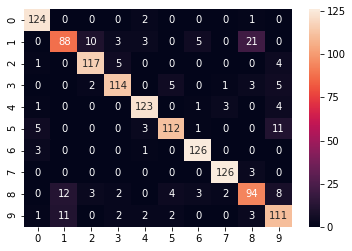

In [7]:
import seaborn as sns
sns.heatmap(rf_confmat, annot=True,  fmt='', 
            xticklabels=[str(x) for x in range(10)], yticklabels=[str(x) for x in range(10)])

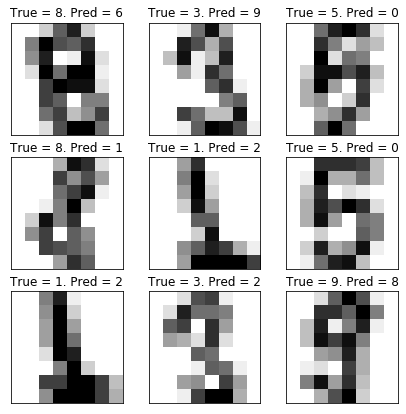

In [8]:
# plot some digits that we get wrong
wrong = np.where(pred_rf != Yte)[0][:9]

f,axs = plt.subplots(3,3,figsize=(7, 7))
objarr = np.empty_like(axs)

for n, ax in enumerate(axs.flat):
    objarr.flat[n] = ax.imshow(np.reshape(Xte[wrong[n]],(8,8)).astype(int),
                              cmap='gray_r', interpolation='nearest')
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title("True = " + str(int(Yte[wrong[n]])) +". Pred = " + str(int(pred_rf[wrong[n]])))

In [9]:
# compute precision and recall
# Note: precision & recall are for 2-class; multi-class returns weighted avg. prec/recall

rf_precision = metrics.precision_score(Yte, pred_rf,average="weighted") # TP / (TP + FP)
rf_recall = metrics.recall_score(Yte, pred_rf,average="weighted") # TP / (TP + FN)

print("Avg. Precision: ",rf_precision)
print("Avg. Recall: ", rf_recall)

Avg. Precision:  0.8739834417704949
Avg. Recall:  0.8750963762528913


AUC for digit=1: 0.9840814712280008


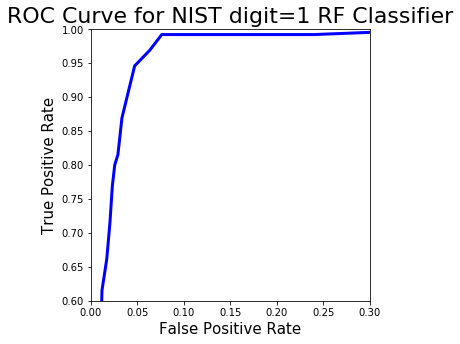

In [10]:
#  ROC curve, AUC for RF classifier using digit = 1
digit = 1
Yte_1 = list(map(lambda x: x == digit and 1. or 0.,Yte)) # does Y = digit

pred_rf_prob = classifier.predict_proba(Xte) 

pred_rf_prob_1 = pred_rf_prob[:,digit]
fpr, tpr, thresholds = metrics.roc_curve(Yte_1, pred_rf_prob_1)

f, ax = plt.subplots(1,1,figsize=(5, 5))
ax.plot(fpr,tpr,'b-',linewidth=3)
ax.set_xlim([0.,0.3])
ax.set_ylim([0.6,1.0005])
ax.set_xlabel("False Positive Rate",size=15)
ax.set_ylabel("True Positive Rate",size=15)
ax.set_title("ROC Curve for NIST digit={} RF Classifier".format(digit),size=22)
print("AUC for digit={}: ".format(digit) + str(metrics.auc(fpr,tpr)))

$\textbf{Tuning the Classifier}$  
======================================================

For now we have used an RF classifier with the choice of `n_estimators` and the default parameters.

Q: How do I choose which model and (hyper) parameters to use?

 - KNN with what # of neighbors?
 - SVM which what kernel & bandwidth?
 - RF with how many estimators and which max_features?
 - GP with what kernel & bandwidth?
 
**Solution: use `grid_search.GridSearchCV`**:
`grid_search.GridSearchCV(estimator, param_grid, loss_func, n_jobs, cv=None)`

Computes cv-fold cross-validated loss_func (or score_func) of estimator over a param_grid on n_jobs cores, and returns the best model!

Let's see how we can rigorously find the optimal model using cross-validation and grid search.

In [29]:
# Find the best Random Forest classifier

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# explore 3 different forest sizes and 3 choices of mtry
parameters = {'n_estimators':[20,50,100],  'max_features':[8,10,'auto'], 
             'criterion': ['gini','entropy']}
rf_tune = model_selection.GridSearchCV(RandomForestClassifier(), parameters, 
                                   n_jobs = -1, cv = 5,verbose=1)
rf_opt = rf_tune.fit(Xtr, Ytr)

print("Best zero-one score: " + str(rf_opt.best_score_) + "\n")
print("Optimal Model:\n" + str(rf_opt.best_estimator_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best zero-one score: 0.944

Optimal Model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
/home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
rf_opt.best_params_

{'criterion': 'entropy', 'max_features': 8, 'n_estimators': 50}

## Towards interpretability

Which features are important in my model?

In [31]:
%matplotlib inline
feature_importances = rf_opt.best_estimator_.feature_importances_
feature_importances = feature_importances.reshape(8,8)
print(feature_importances.shape)

(8, 8)


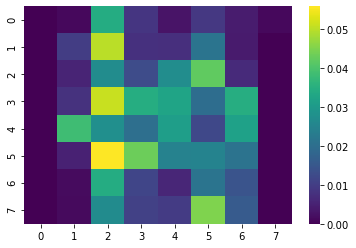

In [32]:
sns.heatmap(feature_importances, cmap=plt.cm.viridis)

**sklearn FRE**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data']
Y = digits['target']

clf = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=clf, n_features_to_select=1, step=1)
rfe.fit(X, Y)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

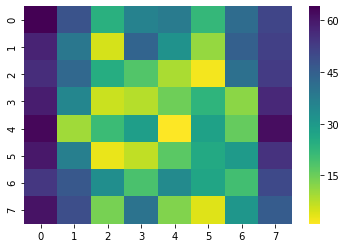

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

ranking = rfe.ranking_.reshape(digits.images[0].shape)
sns.heatmap(ranking, cmap=plt.cm.viridis_r)

** LightGBM **

A fast gradient boosting framework that uses tree-based learning algorithm, generally useful for "big" datasets (say 10k rows).

In [ ]:
# on a mac: brew install libomp
# !conda install -c conda-forge lightgbm graphviz -y

In [35]:
import lightgbm

In [36]:
import pandas as pd
import lightgbm as lgb

import matplotlib.pyplot as plt

%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [37]:
!wget https://github.com/microsoft/LightGBM/blob/master/examples/regression/regression.train?raw=true

--2019-06-05 13:37:06--  https://github.com/microsoft/LightGBM/blob/master/examples/regression/regression.train?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/microsoft/LightGBM/raw/master/examples/regression/regression.train [following]
--2019-06-05 13:37:06--  https://github.com/microsoft/LightGBM/raw/master/examples/regression/regression.train
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/microsoft/LightGBM/master/examples/regression/regression.train [following]
--2019-06-05 13:37:06--  https://raw.githubusercontent.com/microsoft/LightGBM/master/examples/regression/regression.train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecti

In [38]:
!wget https://github.com/microsoft/LightGBM/blob/master/examples/regression/regression.test?raw=true

--2019-06-05 13:37:10--  https://github.com/microsoft/LightGBM/blob/master/examples/regression/regression.test?raw=true
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/microsoft/LightGBM/raw/master/examples/regression/regression.test [following]
--2019-06-05 13:37:10--  https://github.com/microsoft/LightGBM/raw/master/examples/regression/regression.test
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/microsoft/LightGBM/master/examples/regression/regression.test [following]
--2019-06-05 13:37:10--  https://raw.githubusercontent.com/microsoft/LightGBM/master/examples/regression/regression.test
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to

In [42]:
df_train = pd.read_csv('regression.train?raw=true', header=None, sep='\t')
df_test = pd.read_csv('regression.test?raw=true', header=None, sep='\t')

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)
print("Dataset size: ", len(y_train), " Number of features is 28: ", X_train.shape)

Dataset size:  7000  Number of features is 28:  (7000, 28)


Create Dataset object for LightGBM

In [43]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

Configuration dictionary

In [44]:
params = {
    'num_leaves': 5,
    'metric': ['l1', 'l2'],
    'verbose': -1
}

In [45]:
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

[10]	training's l2: 0.217995	training's l1: 0.457448	valid_1's l2: 0.21641	valid_1's l1: 0.456464
[20]	training's l2: 0.205099	training's l1: 0.436869	valid_1's l2: 0.201616	valid_1's l1: 0.434057
[30]	training's l2: 0.197421	training's l1: 0.421302	valid_1's l2: 0.192514	valid_1's l1: 0.417019
[40]	training's l2: 0.192856	training's l1: 0.411107	valid_1's l2: 0.187258	valid_1's l1: 0.406303
[50]	training's l2: 0.189593	training's l1: 0.403695	valid_1's l2: 0.183688	valid_1's l1: 0.398997
[60]	training's l2: 0.187043	training's l1: 0.398704	valid_1's l2: 0.181009	valid_1's l1: 0.393977
[70]	training's l2: 0.184982	training's l1: 0.394876	valid_1's l2: 0.178803	valid_1's l1: 0.389805
[80]	training's l2: 0.1828	training's l1: 0.391147	valid_1's l2: 0.176799	valid_1's l1: 0.386476
[90]	training's l2: 0.180817	training's l1: 0.388101	valid_1's l2: 0.175775	valid_1's l1: 0.384404
[100]	training's l2: 0.179171	training's l1: 0.385174	valid_1's l2: 0.175321	valid_1's l1: 0.382929


/home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/ijpulidos/anaconda3/envs/ml_course/lib/python3.6/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [46]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

In [47]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])


interactive(children=(Dropdown(description='metric_name', options=('l1', 'l2'), value='l1'), Output()), _dom_c…

Plot feature importances


In [48]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=4):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

In [49]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…

In [50]:
def render_tree(tree_index, show_info, precision=4):
    show_info = None if 'None' in show_info else show_info
    return lgb.create_tree_digraph(gbm, tree_index=tree_index,
                                   show_info=show_info, precision=precision)

In [ ]:
#!conda install graphviz pydot -y

In [51]:
if INTERACTIVE:
    # create widget to switch between trees and control info in nodes
    interact(render_tree,
             tree_index=(0, gbm.num_trees() - 1),
             show_info=SelectMultiple(  # allow multiple values to be selected
                 options=['None',
                          'split_gain',
                          'internal_value',
                          'internal_count',
                          'leaf_count'],
                 value=['None']),
             precision=(0, 10))
    tree = None
else:
    tree = render_tree(84, ['None'])
tree


interactive(children=(IntSlider(value=49, description='tree_index', max=99), SelectMultiple(description='show_…